## Topics

* Overfitting and Underfitting
* Cross-validation
* Regularization
    * Lasso(L1) regularization
    * Ridge(L2) regularization

### Utilize the EDA and model from Linear regression file

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("auto_mpg.csv")

# one hot encode categorical variables Fuel Type using pandas getdummies

ohe_model_yr = pd.get_dummies(df['model year'],prefix='yr')
ohe_origin = pd.get_dummies(df['origin'],prefix='origin')

# concat the ohe_fuel dummies with original dataframe X
df = pd.concat([df, ohe_model_yr, ohe_origin], axis=1)


# drop the column Fuel Type from original dataframe X
df.drop(columns=['model year', 'origin', 'yr_70', 'origin_1', 'displacement'],inplace=True)

X = df.drop(['mpg','car name'], axis=1)
y = df.mpg

from sklearn.model_selection import train_test_split

# split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=123)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

X_train['horsepower'].fillna(X_train.horsepower.median(), inplace=True)
X_test['horsepower'].fillna(X_train.horsepower.median(), inplace=True)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns= X_train.columns, index = X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns= X_test.columns, index=X_test.index)

(398, 18)
(278, 18)
(120, 18)


### Overfitting
Performance on training sample is better than on test(unseen) sample.
From the below figure, we can see error for test sample starting increasing after certain model complexity.

![Regularization.png](attachment:Regularization.png)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_train_std)

#Print the R2 score and Adjusted R2 Score
print("R squared: {}".format(r2_score(y_train,y_pred)))
#display adjusted R-squared
print("Adjusted R squared: ", 1 - (1-lr.score(X_train_std, y_train))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))

R squared: 0.8618639024998049
Adjusted R squared:  0.8522637103955443


In [ ]:
y_pred = lr.predict(X_test_std)

#Print the R2 score and Adjusted R2 Score
print("R squared: {}".format(r2_score(y_test,y_pred)))
#display adjusted R-squared
print("Adjusted R squared: ", 1 - (1-lr.score(X_test_std, y_test))*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))

R squared: 0.8140948614439467
Adjusted R squared:  0.7809632525923729


### Conclusion : 
Adjusted $R^2$ on training sample = **0.86** &
Adjusted $R^2$ on test sample = **0.78**
$ \implies$ **Overfitting**

### Regularization

* For linear model, it is constraining or regularizing the size of the coefficients, thus shrinking them towards zero.
* reduces model variance 
* minimizes overfitting
* Lasso regression shrinks coefficients all the way to zero, thus removing them from the model
* Ridge regression shrinks coefficients toward zero, but they rarely reach zero

### Lasso Regression
$$ L_{lasso}(\hat{\beta}) = \sum\limits_{i=1}^{n}(y_{i}-x_{i}\hat{\beta})^{2} + \alpha\sum\limits_{j=1}^{n}{\hat{\mid\beta}_{j}}\mid $$

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_std,y_train)
train_score_ls =lasso.score(X_train_std,y_train)
test_score_ls =lasso.score(X_test_std,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.8203994804123289
The test score for ls model is 0.7997995105771711


### Cross-Validation

We have an accuracy of around 95 percent. But a model which performed well on current test data(as it is randomly split) may not perform well on new test dataset. So we create multiple test set in a data & try to find out the paramter value which perform best on all the test datasets.

1. Split the dataset into k equal partitions
2. Use first fold as testing data and union of other folds as training data and calculate testing accuracy
3. Repeat step 1 and step 2. Use different set as test data different times. That is if we are dividing the dataset into k folds. On the first iteration, 1st fold will be test data and union of rest will be training data. Then we will calculate the testing accuracy. Then on next iteration 2nd fold will be test data and union of rest will be training data. Likewise, we will do for all folds.
4. Take the average of these test accuracy as the accuracy of the sample.

![Cross-validation.png](attachment:Cross-validation.png)

In [ ]:
lasso_cv = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))
print("The best alpha for lasso model is {}".format(lasso_cv.alpha_))

0.8618635272334692
0.8141809536823528
The best alpha for lasso model is 0.0001


### Ridge Regression
$$ L_{ridge}(\hat{\beta}) = \sum\limits_{i=1}^{n}(y_{i}-x_{i}\hat{\beta})^{2} + \alpha\sum\limits_{j=1}^{n}{\hat{\beta^{2}_{j}}} $$

In [ ]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
train_score_ls =ridge.score(X_train,y_train)
test_score_ls =ridge.score(X_test,y_test)

print("The train score for ridge model is {}".format(train_score_ls))
print("The test score for ridge model is {}".format(test_score_ls))

The train score for ridge model is 0.8366205064667919
The test score for ridge model is 0.8058923955157602


In [ ]:
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test))) 
print("The best alpha for ridge model is {}".format(ridge_cv.alpha_))

The train score for ridge model is 0.8618629609936223
The test score for ridge model is 0.8142038648100955
The best alpha for ridge model is 0.01


### Plot the Comparision B/w Lasso & Ridge Regression Coefficients

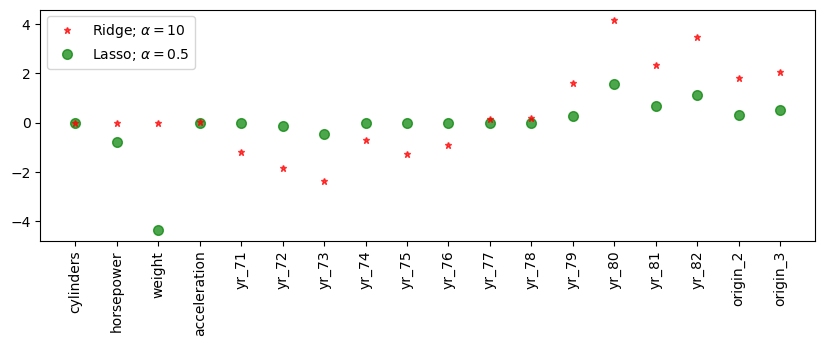

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 3))
plt.plot(X.columns,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(X.columns,lasso.coef_,alpha=0.7,linestyle='none',marker='o',markersize=7,color='green',label=r'Lasso; $\alpha = 0.5$')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Conclusion:
In the above figure, we can conclude that Lasso regression shrinks coefficients all the way to zero but Ridge regression shrinks coefficients toward zero